## Support Data Review

Because the raw data was converted to support tickets. 

I wanted to look further into the data analytics to understand what is happening and where we can improve "service" using ai model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/tweeter_support_tickets.csv")

basic info of the support tickets dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981197 entries, 0 to 981196
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               981197 non-null  object 
 1   tweet_id                 981127 non-null  float64
 2   author_id                980971 non-null  float64
 3   inbound                  981123 non-null  object 
 4   created_at               981127 non-null  object 
 5   text                     981127 non-null  object 
 6   response_tweet_id        966212 non-null  object 
 7   in_response_to_tweet_id  145 non-null     object 
 8   support_team             892928 non-null  object 
 9   conversation             966056 non-null  object 
 10  conversation_count       966056 non-null  float64
 11  conversation_dates       966056 non-null  object 
 12  date_resolved            875147 non-null  object 
 13  time_to_resolve          966056 non-null  float64
dtypes: f

In [4]:
df.head()

,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve
0,0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333
1,1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000
2,2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222
3,3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500
4,4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333


clean up uneeded columns

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve
0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333
1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000
2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222
3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500
4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333


### Support Team

Review data around the support team 

#### Unique number of support teams

In [7]:
unique_support = df['support_team'].unique()

In [8]:
print(f"Unique number of support teams: {len(unique_support)}")

Unique number of support teams: 49071


In [9]:
support_team_df_count = df['support_team'].value_counts()

#### Average support tickets

In [10]:
df['support_team'].value_counts()

support_team
AmazonHelp      87332
AppleSupport    74661
Uber_Support    41275
Delta           30377
AmericanAir     27173
                ...  
461341              1
120027              1
461360              1
461362              1
547863              1
Name: count, Length: 49070, dtype: int64

Text(0.5, 1.0, 'Support ticket per Team')

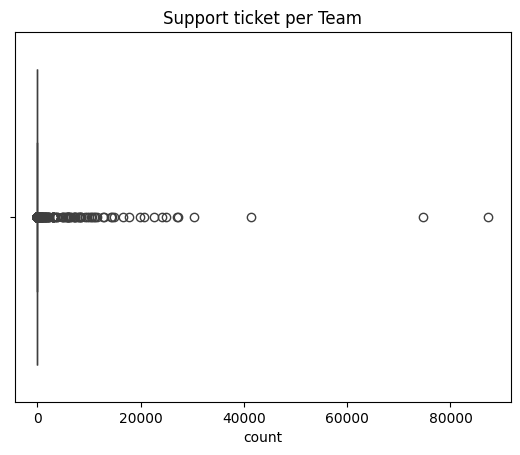

In [11]:
t = sns.boxplot(x=df['support_team'].value_counts())
t.set_title("Support ticket per Team")

In [12]:
print(f"Mean number of support tickets: {df['support_team'].value_counts().mean()}")

Mean number of support tickets: 18.197024658650907


#### View the top 20 support teams

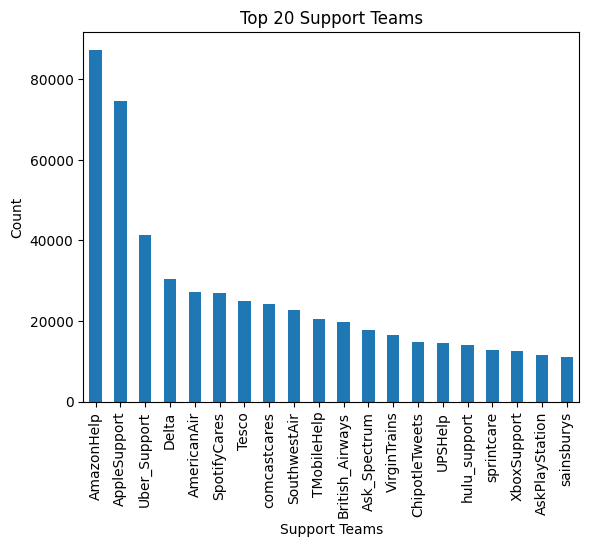

In [13]:
support_team_df_count[:20].plot(kind='bar')
plt.xlabel("Support Teams")
plt.ylabel("Count")
plt.title("Top 20 Support Teams")
plt.show()

#### Total time to resolve by team

In [14]:
top_20_team_count = support_team_df_count.reset_index()[:20]

In [15]:
top_20_teams = top_20_team_count['support_team'].unique()

In [16]:
top_20_teams

array(['AmazonHelp', 'AppleSupport', 'Uber_Support', 'Delta',
       'AmericanAir', 'SpotifyCares', 'Tesco', 'comcastcares',
       'SouthwestAir', 'TMobileHelp', 'British_Airways', 'Ask_Spectrum',
       'VirginTrains', 'ChipotleTweets', 'UPSHelp', 'hulu_support',
       'sprintcare', 'XboxSupport', 'AskPlayStation', 'sainsburys'],
      dtype=object)

In [17]:
df_20_filter = df[df['support_team'].isin(top_20_teams)]

In [18]:
df_20_filter.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,conversation_count,conversation_dates,date_resolved,time_to_resolve
0,18.0,115713.0,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,@115713 H there! We'd definitely like to work ...,2.0,"['Tue Oct 31 19:59:13 +0000 2017', 'Tue Oct 31...",Tue Oct 31 19:59:13 +0000 2017,0.053333
1,20.0,115715.0,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,@115715 Please send me a private message so th...,2.0,"['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:10 +0000 2017,0.110000
2,29.0,115716.0,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,@115716 The information pertaining to the acco...,2.0,"['Tue Oct 31 22:05:37 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:05:37 +0000 2017,0.067222
3,31.0,115717.0,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"@115717 Hello, My apologies for any frustratio...",2.0,"['Tue Oct 31 22:12:09 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:12:09 +0000 2017,0.087500
4,33.0,115718.0,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,@115718 I apologize for the inconvenience. I w...,2.0,"['Tue Oct 31 22:10:08 +0000 2017', 'Tue Oct 31...",Tue Oct 31 22:10:08 +0000 2017,0.053333


In [19]:
support_time_sum = df_20_filter.groupby('support_team')['time_to_resolve'].sum().reset_index().sort_values('time_to_resolve', ascending=False)

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_7819/901303479.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Total Support Time to Resolve (hours)')

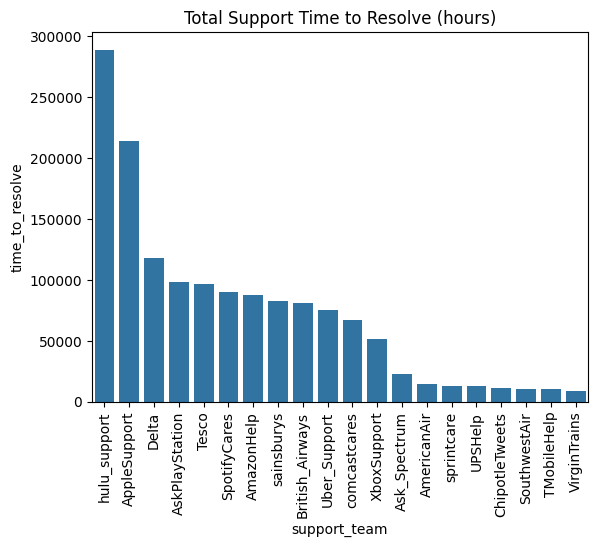

In [20]:
g = sns.barplot(support_time_sum, x='support_team', y='time_to_resolve')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Total Support Time to Resolve (hours)")

interesting to see the support time and teams have a mixed order. You would think amazon support tickets would be the highest on the list.

#### Mean time to resolve

In [21]:
mean_time_resolve = df['time_to_resolve'].mean()

print(f"Mean time to resolve: {mean_time_resolve} hours")

Mean time to resolve: 15.383010697044938 hours


In [22]:
mean_time_reovle_top20 = df_20_filter['time_to_resolve'].mean()

print(f"Mean time to resolve by top 20: {mean_time_reovle_top20} hours")

Mean time to resolve by top 20: 2.7658656227488807 hours


Looks like the mean time to resolve for the top 20 is dramaically lower then others

### Mean time to resolve per support team

In [23]:
support_time_mean = df_20_filter.groupby('support_team')['time_to_resolve'].mean().reset_index().sort_values('time_to_resolve', ascending=False)

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_7819/2722568684.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mean Time to Resolve (hours)')

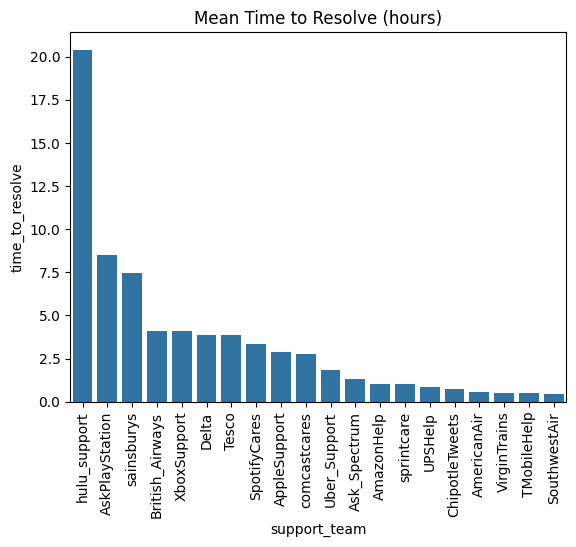

In [24]:
g = sns.barplot(support_time_mean, x='support_team', y='time_to_resolve')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Mean Time to Resolve (hours)")

Looks like hulu support also has the highest average. However the oder changes again.

#### Average Tweet Conversation Length

In [25]:
print(f"Average number of tweeter conversation: {df['conversation_count'].mean()}")

Average number of tweeter conversation: 1.9058967596081386


In [26]:
print(f"Average number of tweeter conversation: {df_20_filter['conversation_count'].mean()}")

Average number of tweeter conversation: 1.9556875051080822


Intesteing to see the average number of conversation is higher for the top 20. Lets find out what the mean per team

#### Average Conversation length per Team

In [27]:
coversation_length_mean = df_20_filter.groupby('support_team')['conversation_count'].mean().reset_index().sort_values('conversation_count', ascending=False)

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_7819/3631404236.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Mean Convesration by Team')

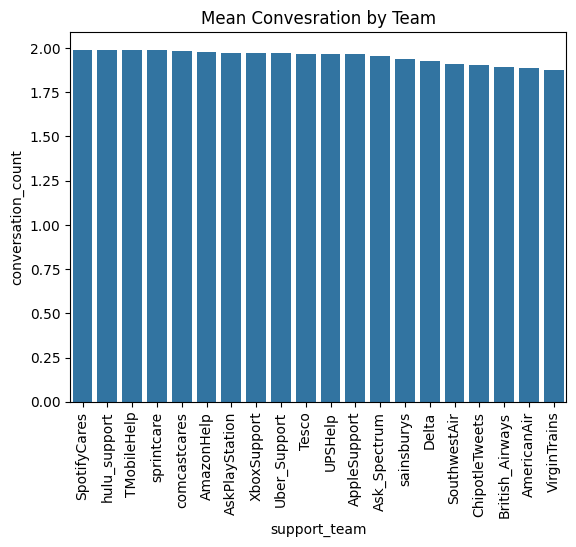

In [28]:
g = sns.barplot(coversation_length_mean, x='support_team', y='conversation_count')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Mean Convesration by Team")

Looks like the number of conversation is very similar. Issue appears to be how long the agent returns back to customer.